In [1]:
from discrepancy_modeling.discrepancy_modeling import DiscrepancyModel as DiscrepancyModel
from cognitive_modeling.cpc_like import fit_cpc_like
from data.data import get
from accuracy_comparison.accuracy_comparison import accuracy_comparison_single
from cognitive_modeling.models.utility_models import u_pow
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

/Users/aureliennioche/Documents/PythonProjects/CogModelDiscrepancy/risk_application/discrepancy_modeling/discrepancy_modeling.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%config InlineBackend.figure_format = "retina"
sns.set_context("paper")

In [3]:
data = get()

In [4]:
counts = data.subject.value_counts()
subject_325 = counts[counts == 325].index  # Take subjects with 325 trials
subject_325

Int64Index([10100, 11020, 11303, 11302, 11301, 11030, 11029, 11028, 11027,
            11026,
            ...
            10342, 10320, 10321, 10316, 10322, 10325, 10330, 10331, 10340,
            10341],
           dtype='int64', length=125)

In [5]:
s = 11020

In [6]:
settings = dict(
    u = u_pow,
    seed_cog_fit = 12345, 
    seed_dm_train= 12345,
    learning_rate = 0.05,
    mean_correction = 2,
    epochs = 300,
    n_samples=100,
    n_inducing_points = 50, 
    learn_inducing_locations=False,
    jitter=1e-07,
    h="sigmoid"
)

In [7]:
def train_single(
        s, u,
        seed_cog_fit,
        seed_dm_train,
        learning_rate,
        mean_correction,
        epochs,
        n_inducing_points, 
        **other_dm_settings):

    d = data[data.subject == s]
    opt_param = fit_cpc_like(d, u=u, w=None, seed=seed_cog_fit)

    tau = opt_param[0]
    theta = opt_param[1]
    
    inducing_points=list(np.linspace(0, 1, n_inducing_points+2)[1:-1])

    dm = DiscrepancyModel(
        data=d,
        u=u,
        theta=theta,
        tau=tau,
        inducing_points=inducing_points,
        **other_dm_settings)

    dm.train(
        epochs=epochs,
        learning_rate=learning_rate,
        seed=seed_dm_train,
        progress_bar=True,
        progress_bar_desc=None)
    
    return dm

In [8]:
def plot_single(dm, s):
    test_x = torch.linspace(0.01, 0.99, 1000)

    fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

    ax = axes[0]

    roc_m, roc_dm = accuracy_comparison_single(dm=dm)

    ax.set_title(
        f"subject {s} | roc_m={roc_m:.3f}; roc_dm={roc_dm:.3f} | " \
        f"improv_roc={roc_dm - roc_m:.3f}")

    fill_alpha = 0.3

    m_pred, f_pred = dm.pred(test_x)

    test_x = test_x.numpy()
    m_pred = m_pred.numpy()
    f_pred = f_pred.numpy()

    f_mean = f_pred.mean(axis=0)
    lower, upper = np.percentile(f_pred, [2.5, 97.5], axis=0)

    # GP confidence
    h_conf = ax.fill_between(test_x, upper, lower, color='C0',
                             alpha=fill_alpha,
                             label="Model + correction - Confidence")

    # GP mean
    h_mean, = ax.plot(test_x, f_mean, label="Model + correction - Mean")

    # Model
    h_model, = ax.plot(test_x, m_pred, color='C1', ls="--",
                       label="Model alone")

    ax.set_xlabel("reward")
    ax.set_ylabel("utility")

    ax = axes[1]
    ax.plot(dm.hist_loss)
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")

    fig.tight_layout()
    plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


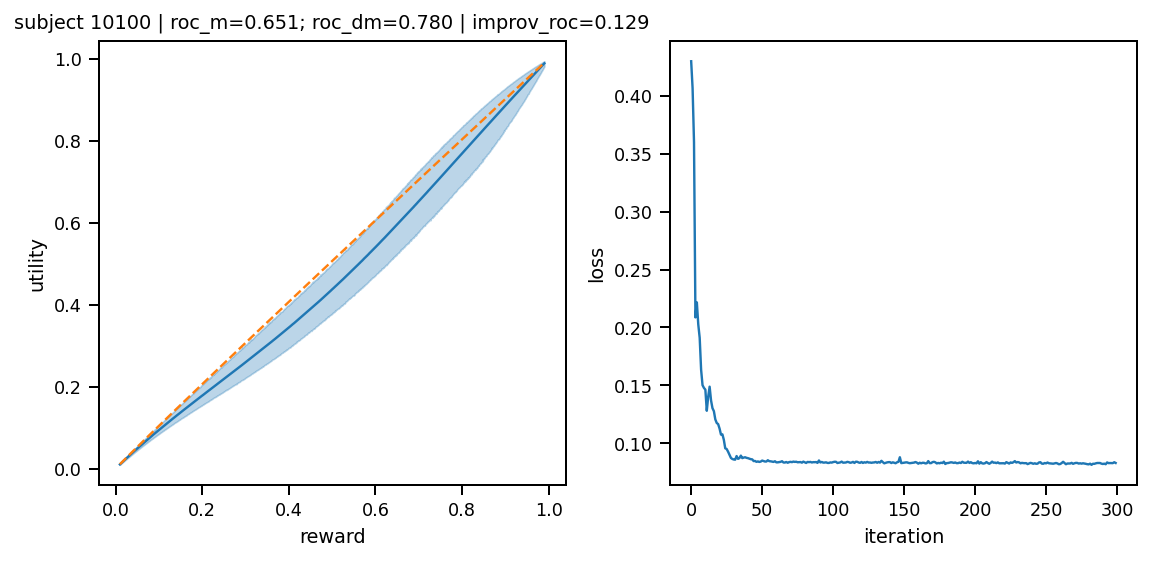

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


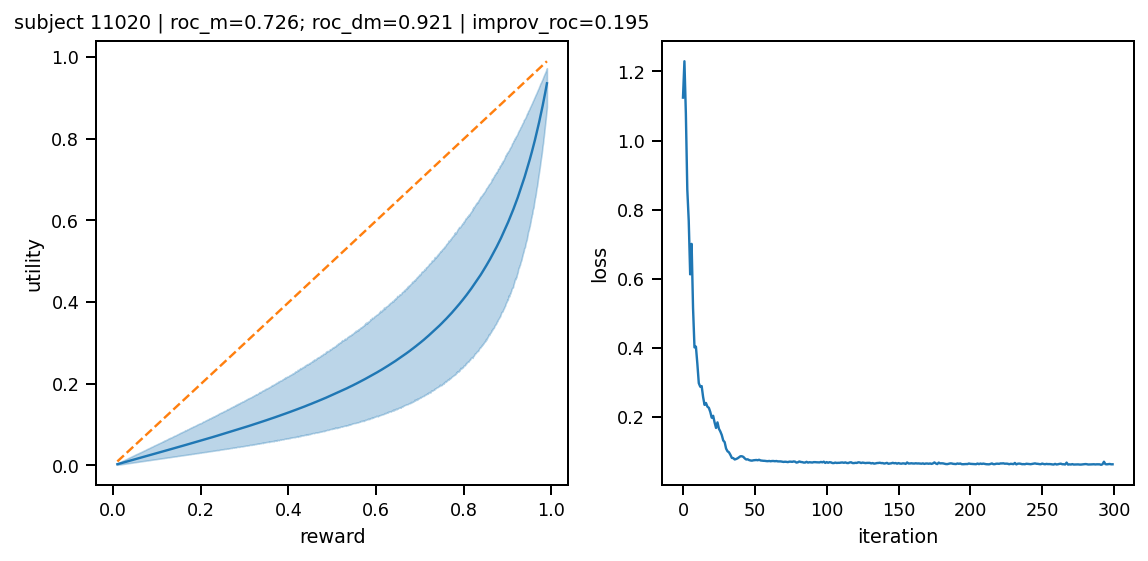

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


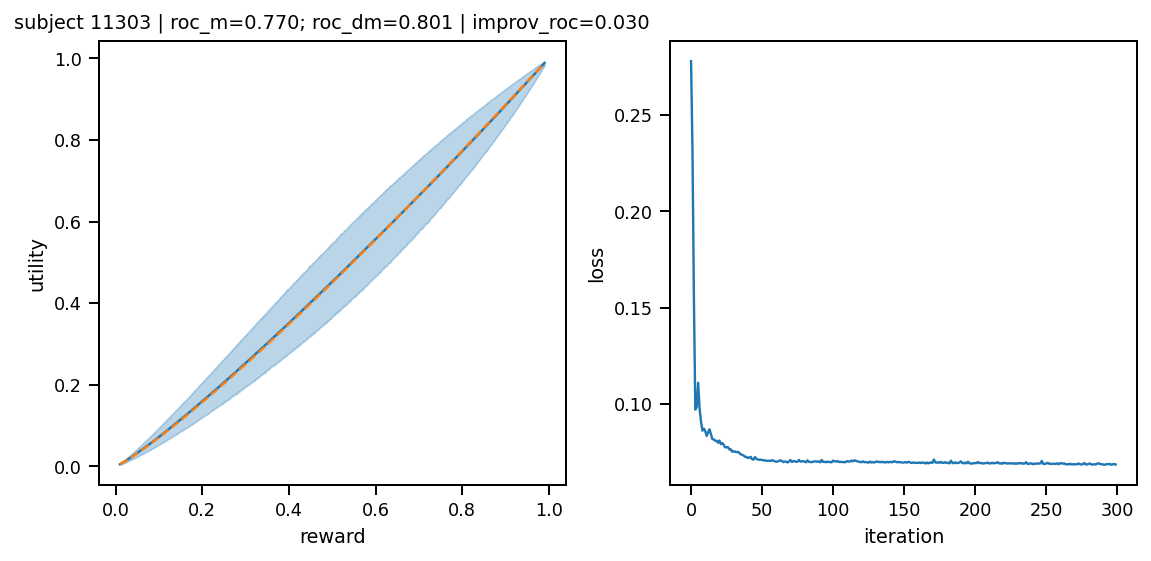

  0%|          | 0/300 [00:00<?, ?it/s]

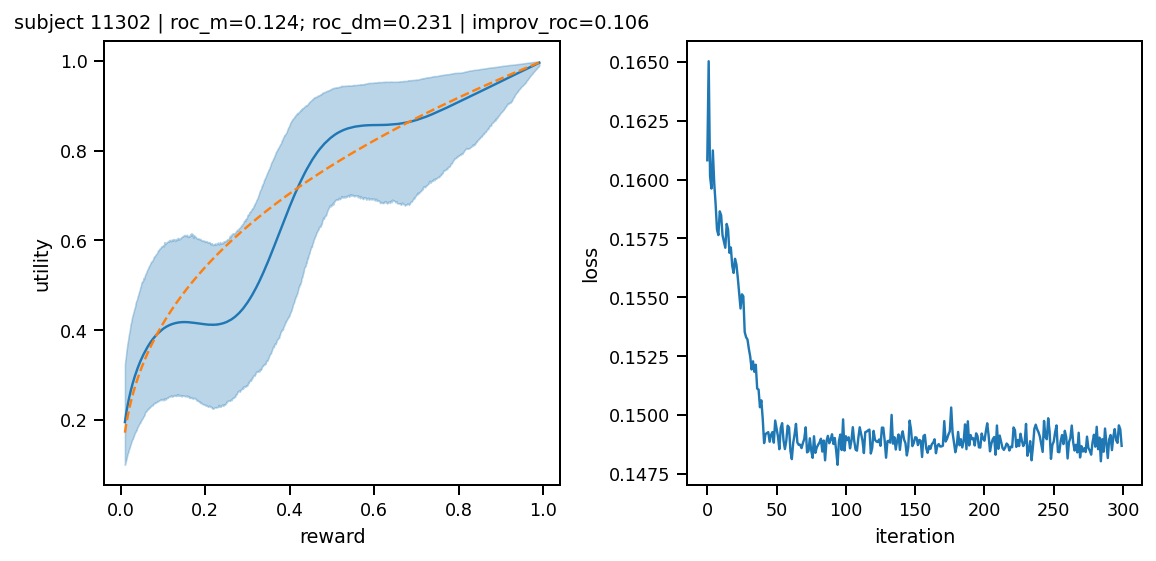

  0%|          | 0/300 [00:00<?, ?it/s]

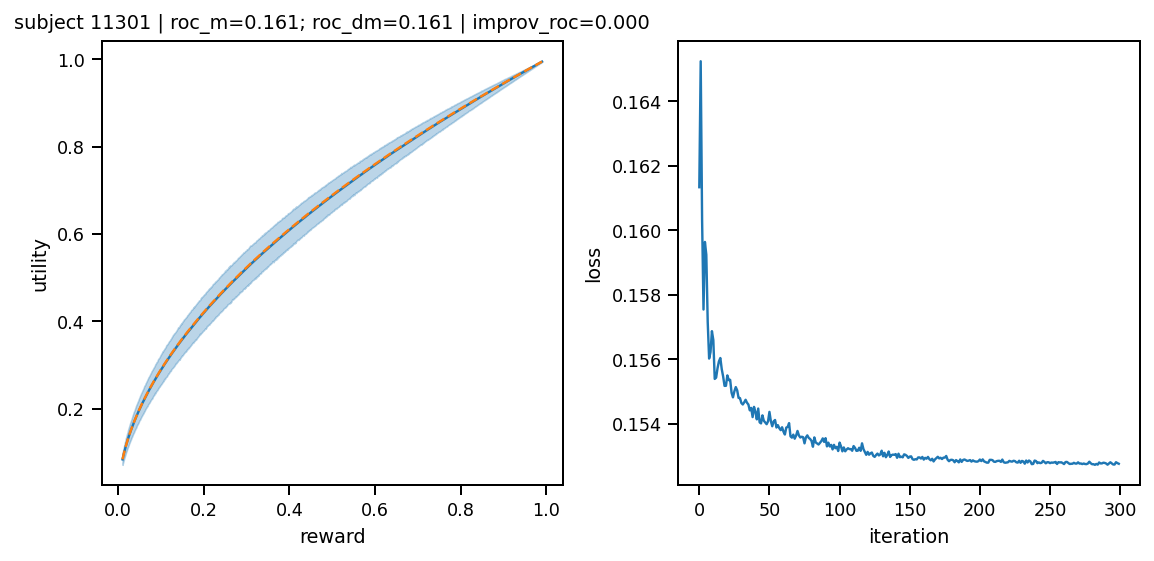

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


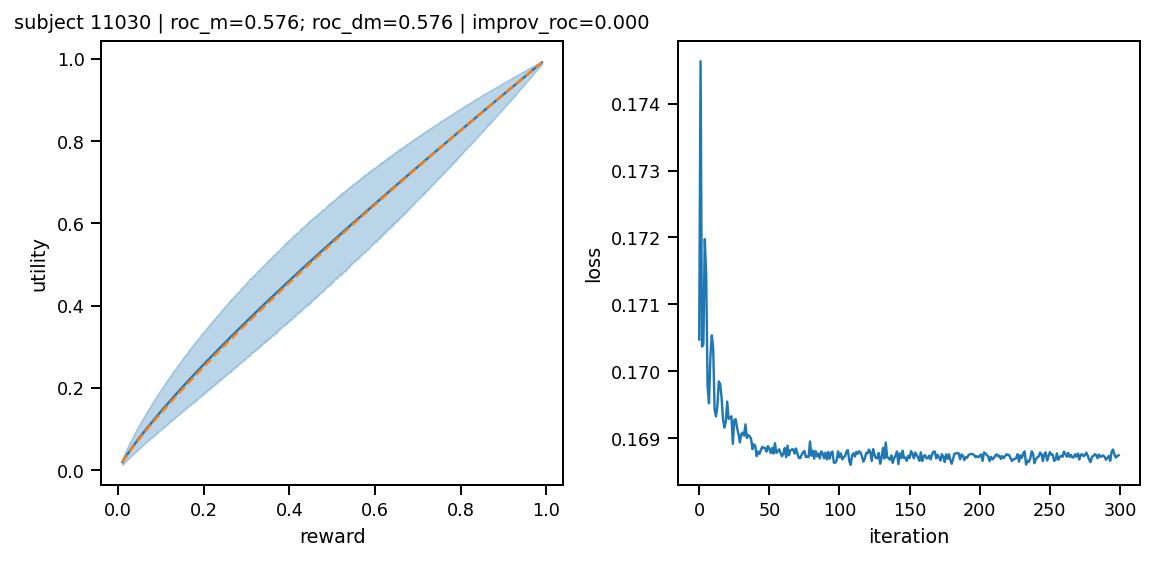

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


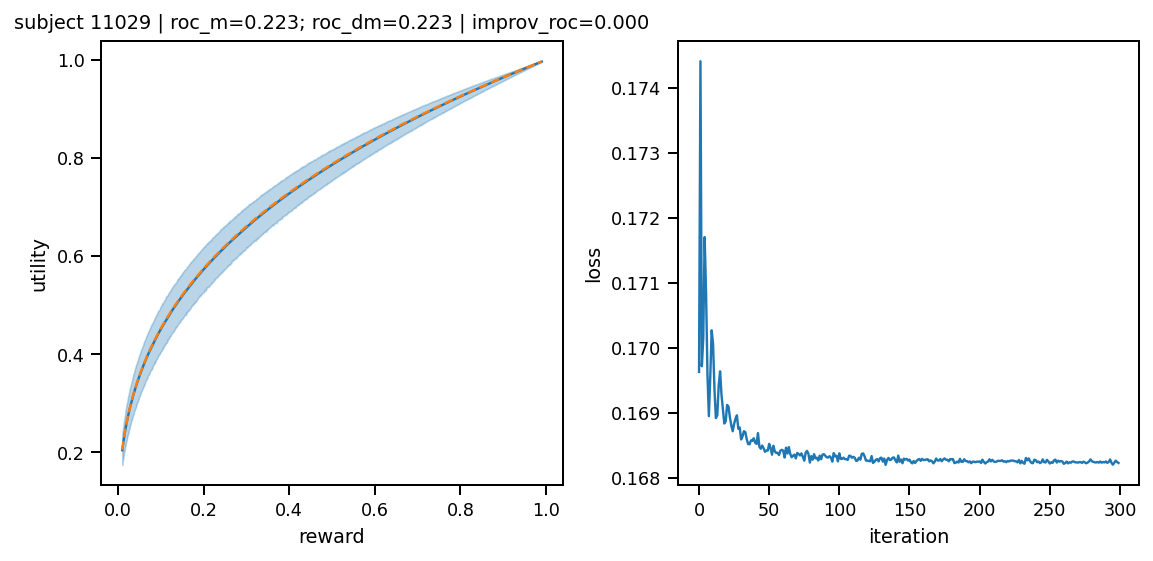

  0%|          | 0/300 [00:00<?, ?it/s]

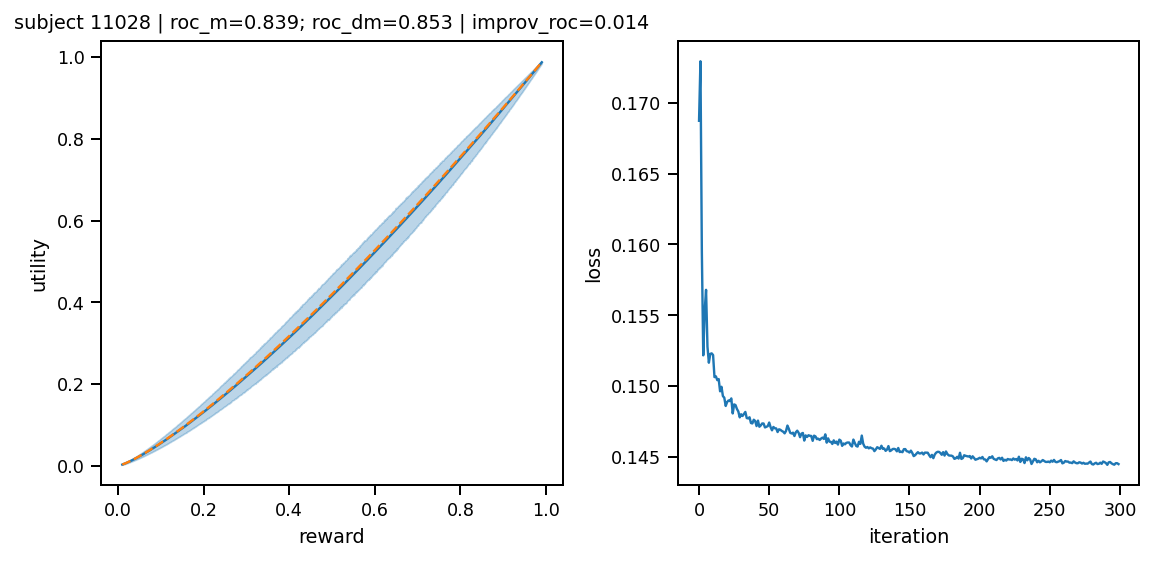

  0%|          | 0/300 [00:00<?, ?it/s]

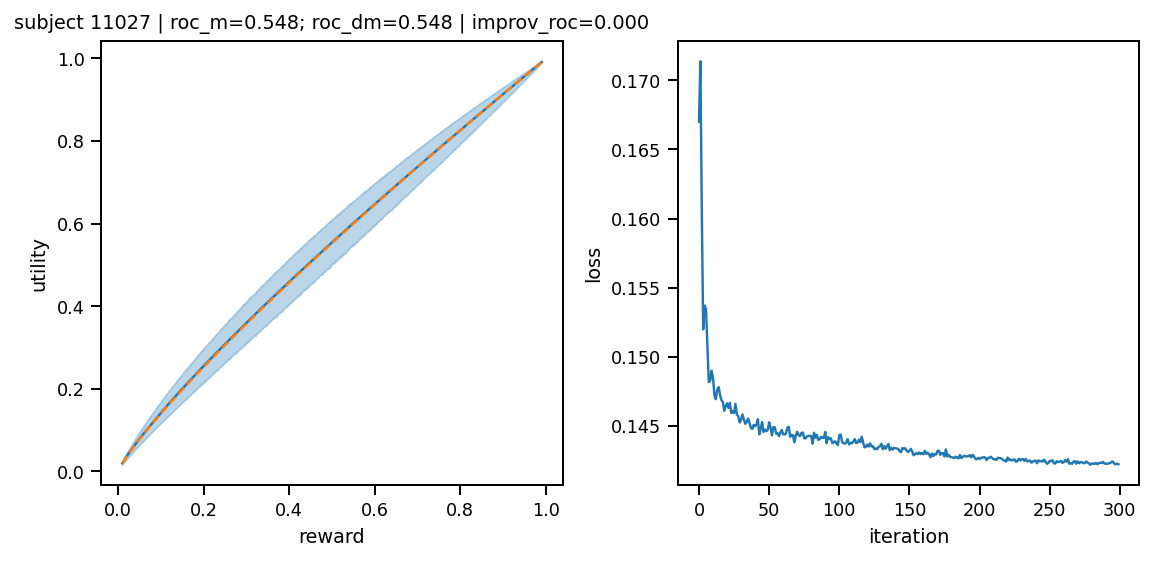

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


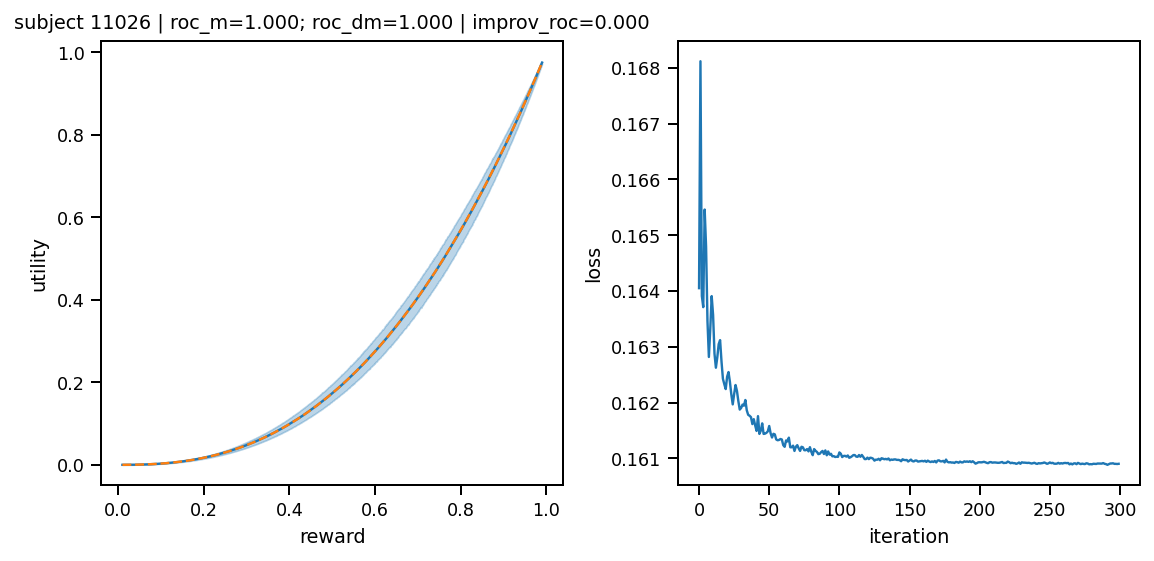

  0%|          | 0/300 [00:00<?, ?it/s]

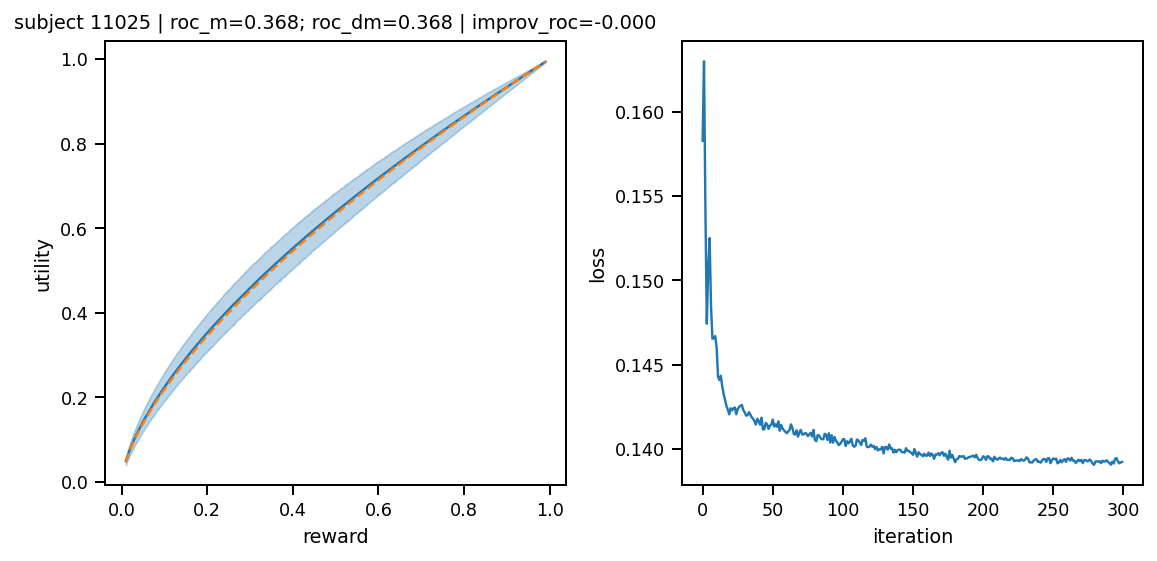

  0%|          | 0/300 [00:00<?, ?it/s]

/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/aureliennioche/.pyenv/versions/3.9.1/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


In [ ]:
for s in subject_325:
    dm = train_single(s=s, **settings)
    plot_single(dm=dm, s=s)